In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Token Distribution

In [2]:
def plot_token_distributions(data):
    # Split data into two ranges
    range1 = data[data['token_index'] <= 2048]
    range2 = data[data['token_index'] > 2048]
    
    # Create a figure with 2x2 subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Bar plots
    token_counts1 = range1['token_index'].value_counts().sort_index()
    token_counts2 = range2['token_index'].value_counts().sort_index()
    
    print(f"IchigoWhisper (0-2048): Codebook {token_counts1.idxmax()} with {token_counts1.max()} records", )
    print(f"WhisperVQ 7lang (2049-2560): Codebook {token_counts2.idxmax()} with {token_counts2.max()} records", )
    
    ax1.bar(token_counts1.index, token_counts1.values, color='skyblue', edgecolor='black')
    ax1.set_title('IchigoWhisper Bar: Tokens 0-2048')
    ax1.set_xlabel('Token Index')
    ax1.set_ylabel('Frequency')

    ax2.bar(token_counts2.index, token_counts2.values, color='lightgreen', edgecolor='black')
    ax2.set_title('WhisperVQ 7lang Bar: Tokens 2049-2560')
    ax2.set_xlabel('Token Index')
    ax2.set_ylabel('Frequency')

    # Histograms
    ax3.hist(range1['token_index'], bins="auto", color='orange', edgecolor='black')
    ax3.set_title('IchigoWhisper Histogram: Tokens 0-2048')
    ax3.set_xlabel('Token Index')
    ax3.set_ylabel('Frequency')

    ax4.hist(range2['token_index'], bins="auto", color='pink', edgecolor='black')
    ax4.set_title('WhisperVQ 7lang Histogram: Tokens 2049-2560')
    ax4.set_xlabel('Token Index')
    ax4.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

## Total Token

In [3]:
def plot_total_token_comparison(data):
    # Split data and get total counts
    ichigo_count = len(data[data['token_index'] <= 2048])
    whisper_count = len(data[data['token_index'] > 2048])
    
    # Create figure
    plt.figure(figsize=(8, 6))
    
    # Create bars
    models = ['IchigoWhisper\n(0-2048)', 'WhisperVQ 7lang\n(2049-2560)']
    counts = [ichigo_count, whisper_count]
    
    # Plot bars
    bars = plt.bar(models, counts, 
                   color=['skyblue', 'lightgreen'],
                   width=0.5,
                   edgecolor='black')
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # Customize plot
    plt.title('Total Token Usage Comparison', fontsize=14)
    plt.ylabel('Total Frequency', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

## Density & Box Plot

In [4]:
def density_box(data):
    # Create figure with 2x3 subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. Density plots
    sns.kdeplot(data=data[data['token_index'] <= 2048], x='token_index', 
                ax=axes[0,0], fill=True, color='skyblue')
    sns.kdeplot(data=data[data['token_index'] > 2048], x='token_index',
                ax=axes[0,1], fill=True, color='lightgreen')
    axes[0,0].set_title('IchigoWhisper (0-2048) Density')
    axes[0,1].set_title('WhisperVQ 7lang (2049-2560) Density')
    
    # 2. Box plots
    sns.boxplot(data=data[data['token_index'] <= 2048], y='token_index',
                ax=axes[1,0], color='skyblue')
    sns.boxplot(data=data[data['token_index'] > 2048], y='token_index',
                ax=axes[1,1], color='lightgreen')
    axes[1,0].set_title('IchigoWhisper Box Plot')
    axes[1,1].set_title('WhisperVQ 7lang Box Plot')
    
    # 3. Stats summary
    stats_text = f"""
    IchigoWhisper Stats:
    Count: {len(data[data['token_index'] <= 2048])}
    ------------------------------
    WhisperVQ Stats:
    Count: {len(data[data['token_index'] > 2048])}
    """
    axes[0,2].text(0.1, 0.5, stats_text, fontsize=12)
    axes[0,2].axis('off')
    
    # Remove empty subplot
    fig.delaxes(axes[1,2])
    
    plt.tight_layout()
    plt.show()


# Experiments

## LibriTTS-R

In [14]:
eng_data = pd.read_csv('data/libritts 1k - merge 7lang - 512 last - p2 5e.csv')

IchigoWhisper (0-2048): Codebook 2048 with 6728 records
WhisperVQ 7lang (2049-2560): Codebook 2165 with 1 records


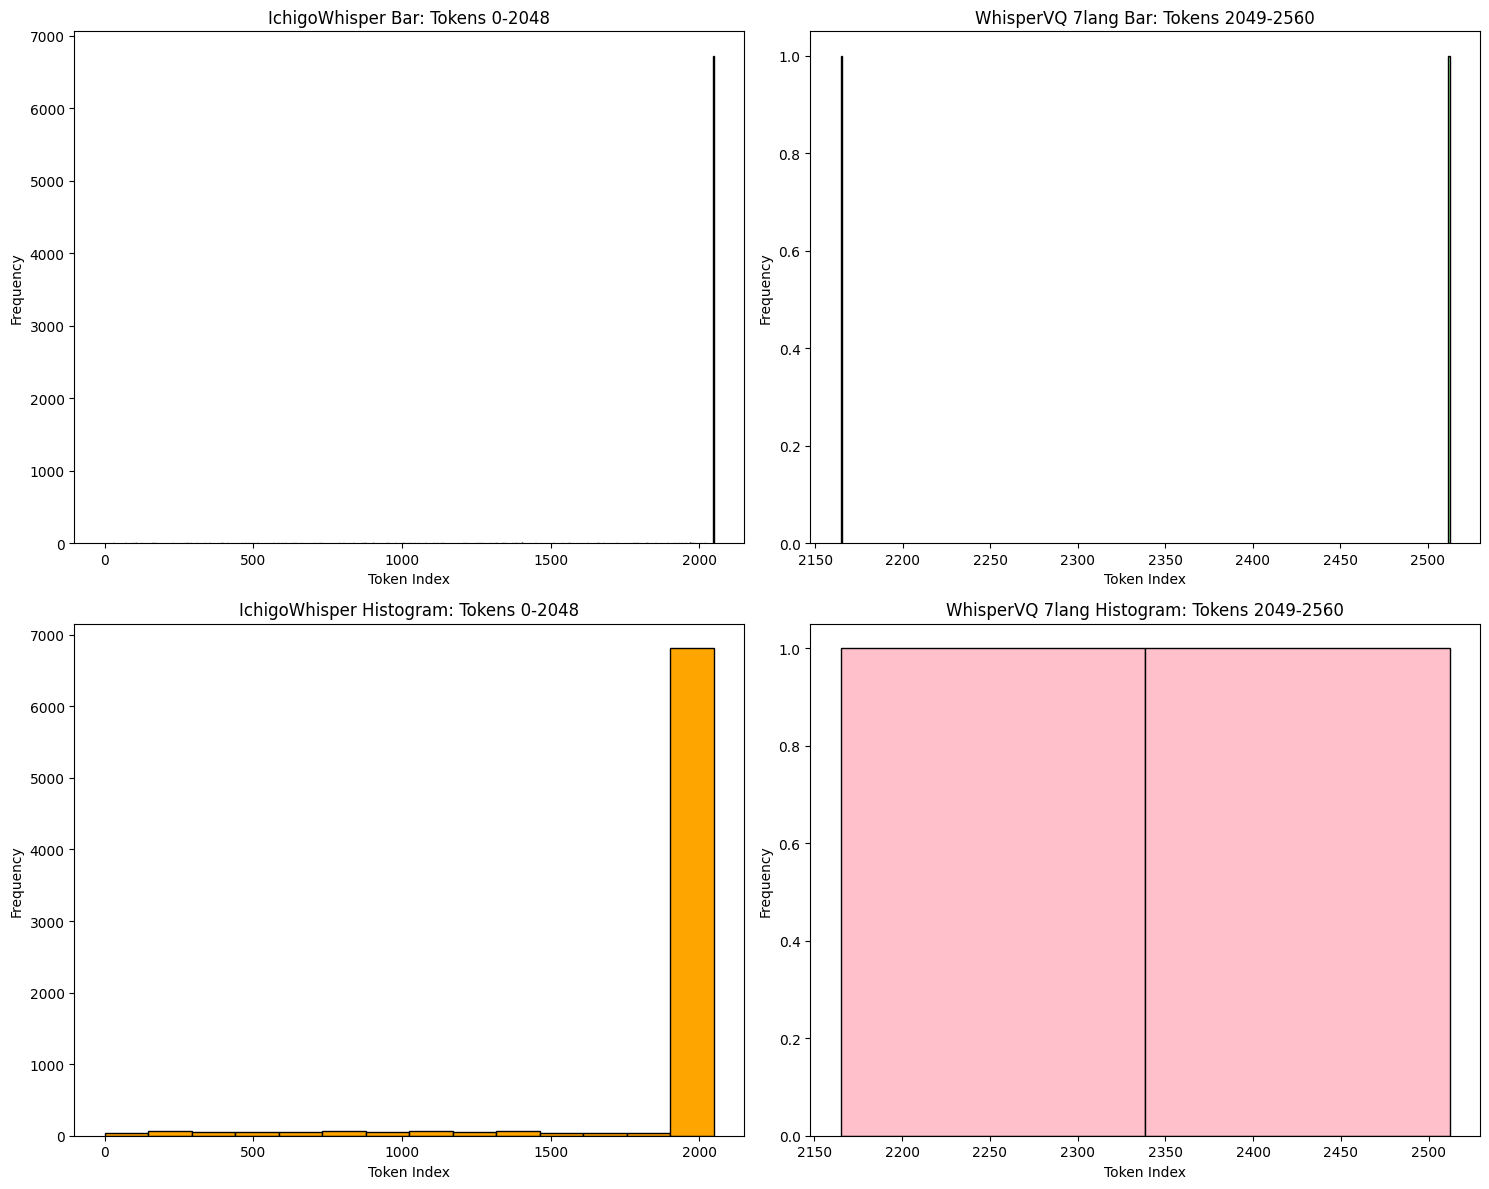

In [15]:
plot_token_distributions(eng_data)

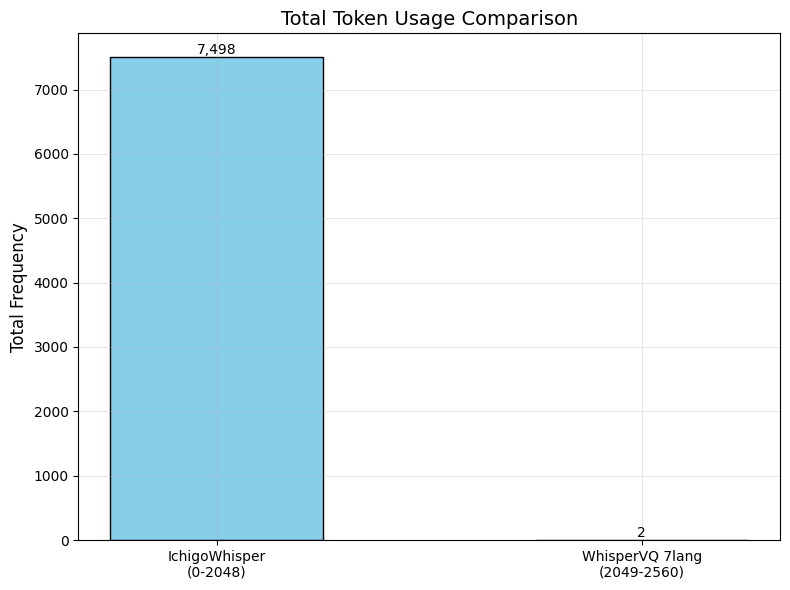

In [16]:
plot_total_token_comparison(eng_data)

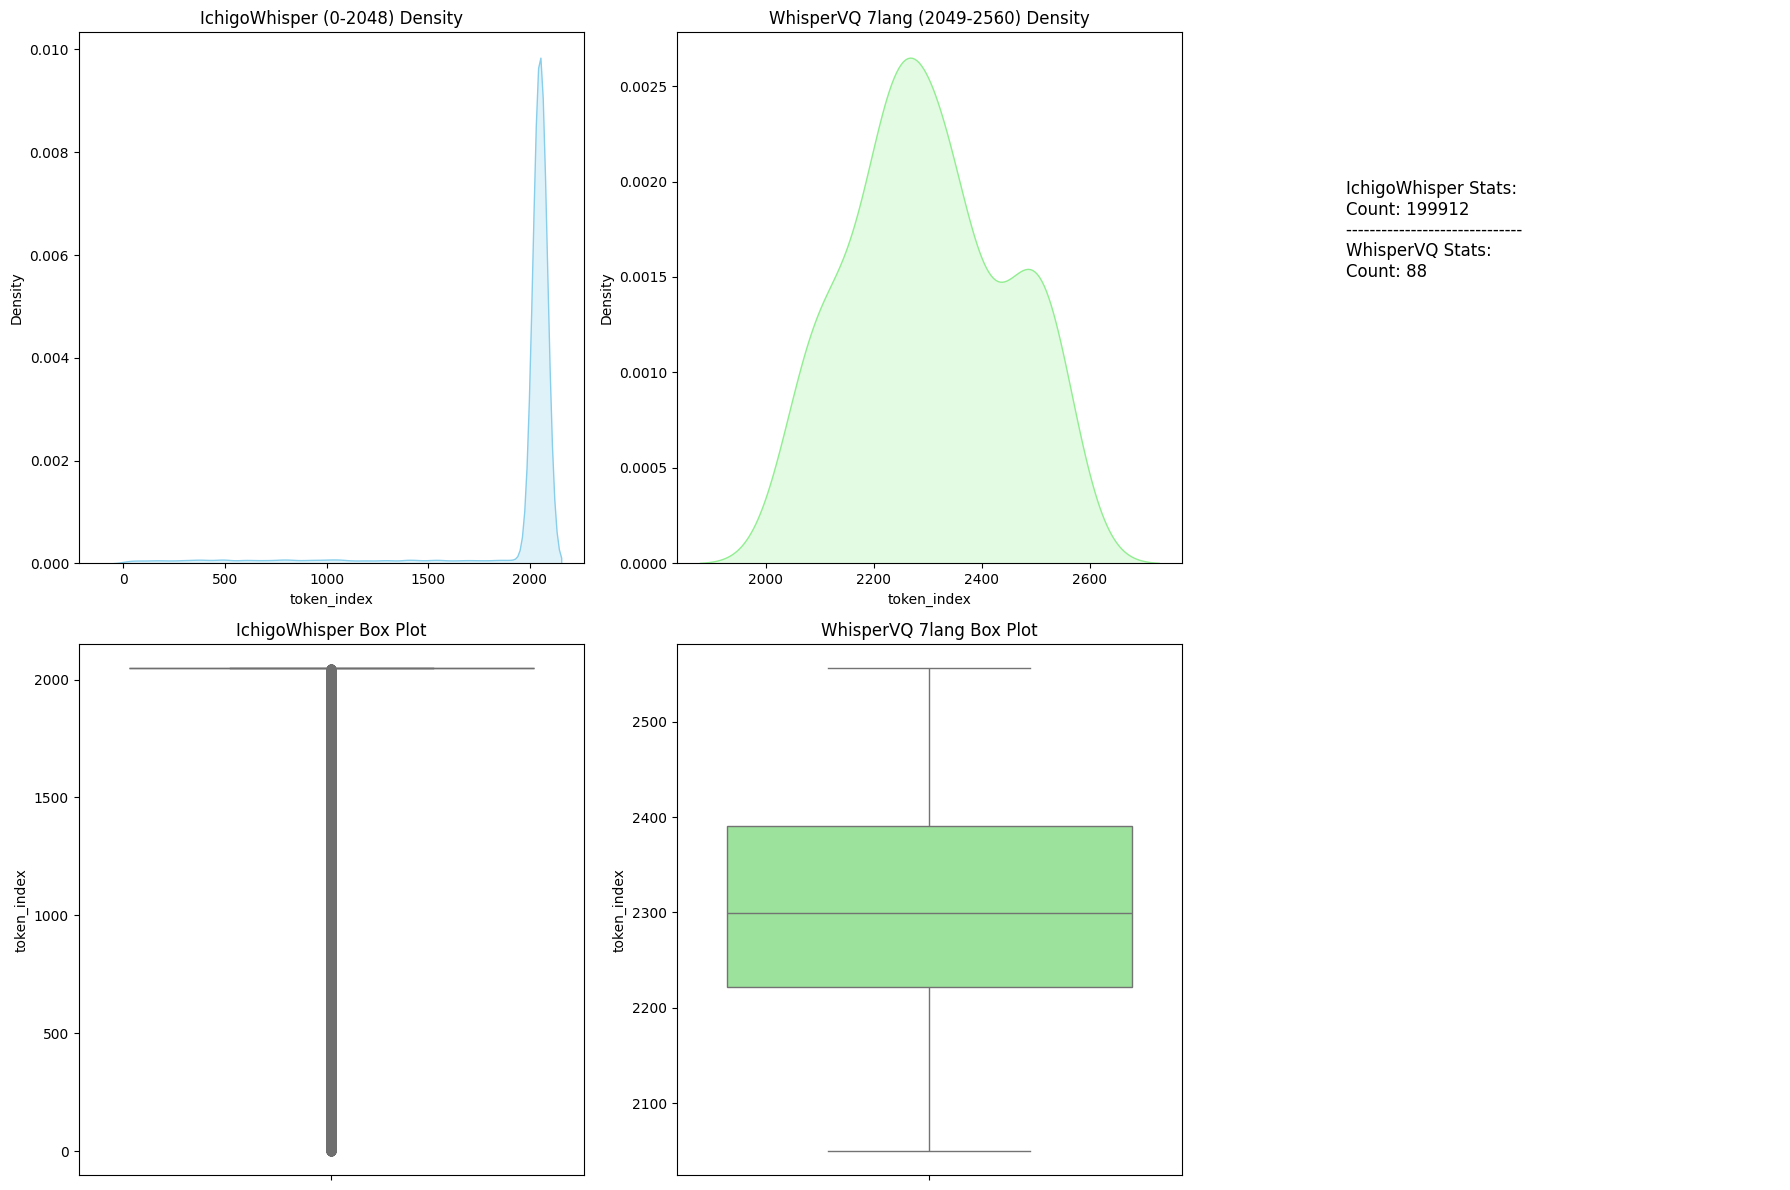

In [8]:
density_box(eng_data)

## viVoice

In [9]:
vie_data = pd.read_csv('data/vivoice 1k - merge 7lang - 512 last - p2 5e.csv')

IchigoWhisper (0-2048): Codebook 2048 with 172974 records
WhisperVQ 7lang (2049-2560): Codebook 2199 with 2 records


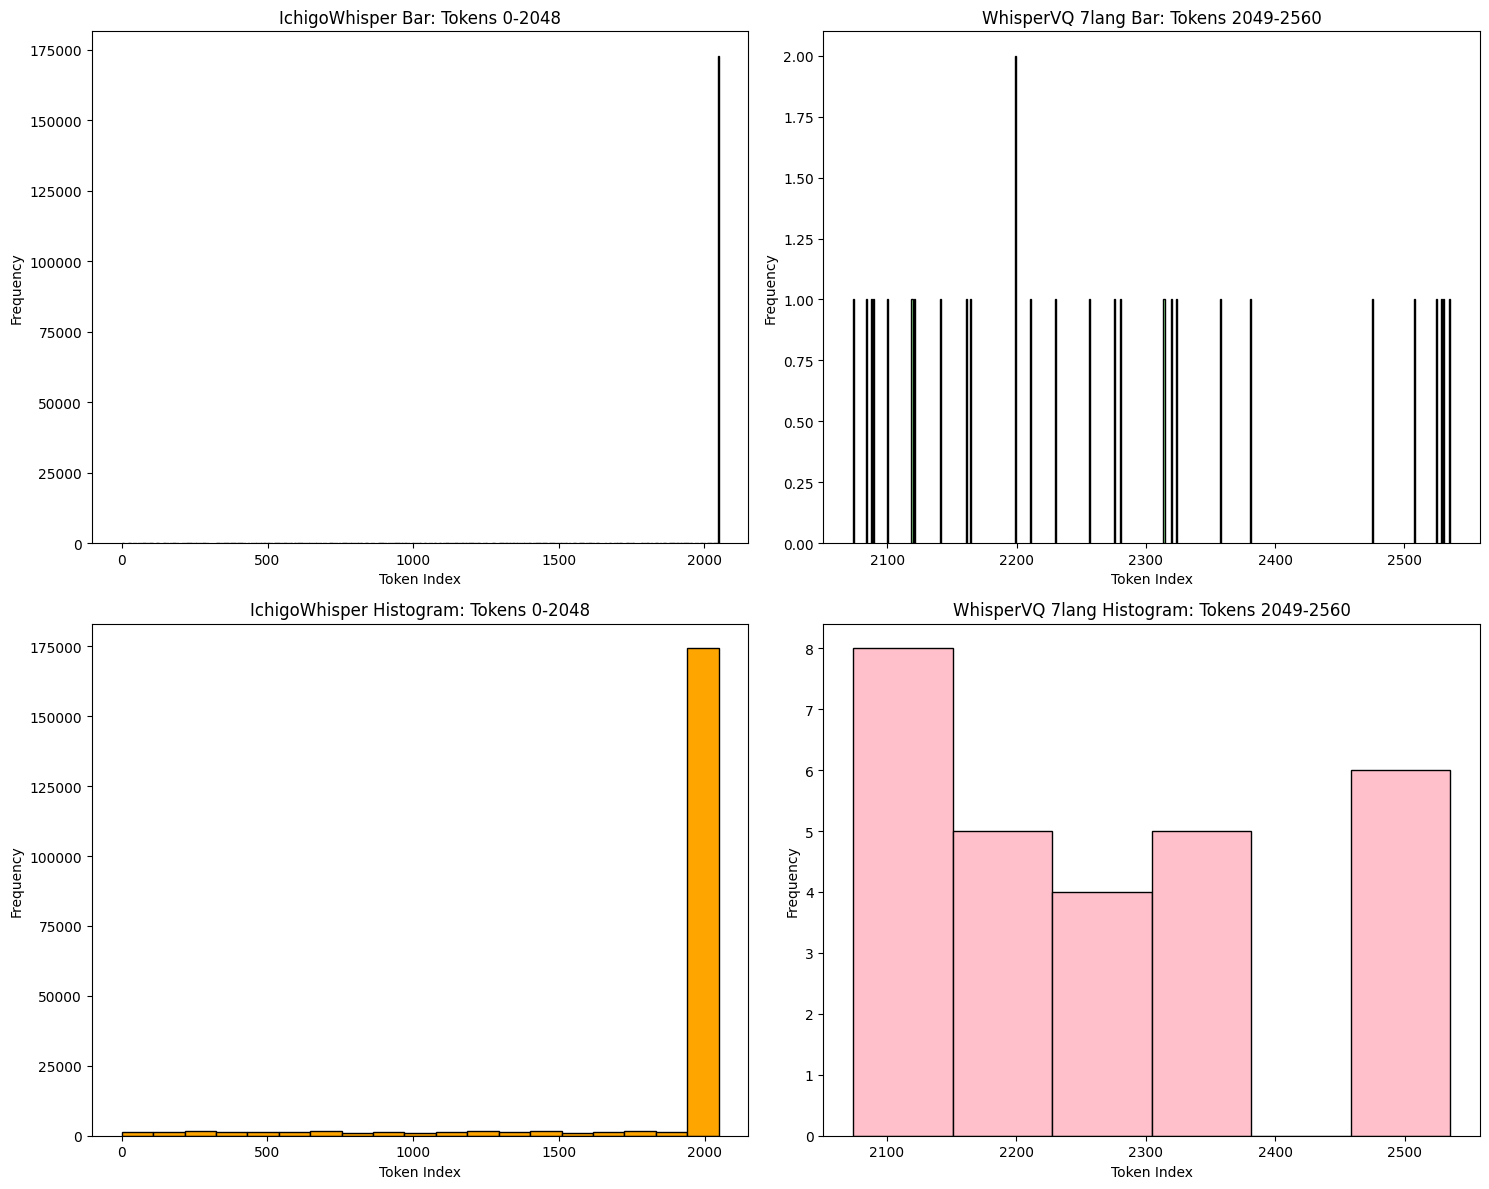

In [10]:
plot_token_distributions(vie_data)

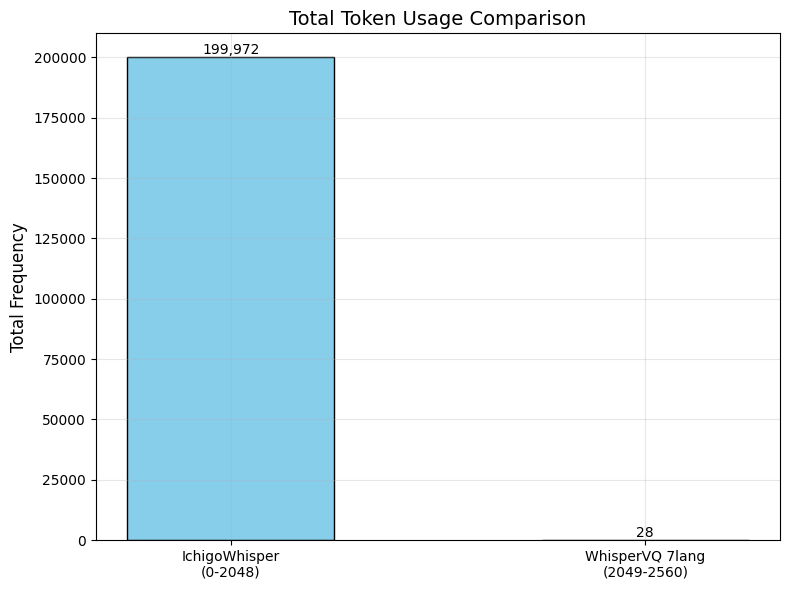

In [11]:
plot_total_token_comparison(vie_data)

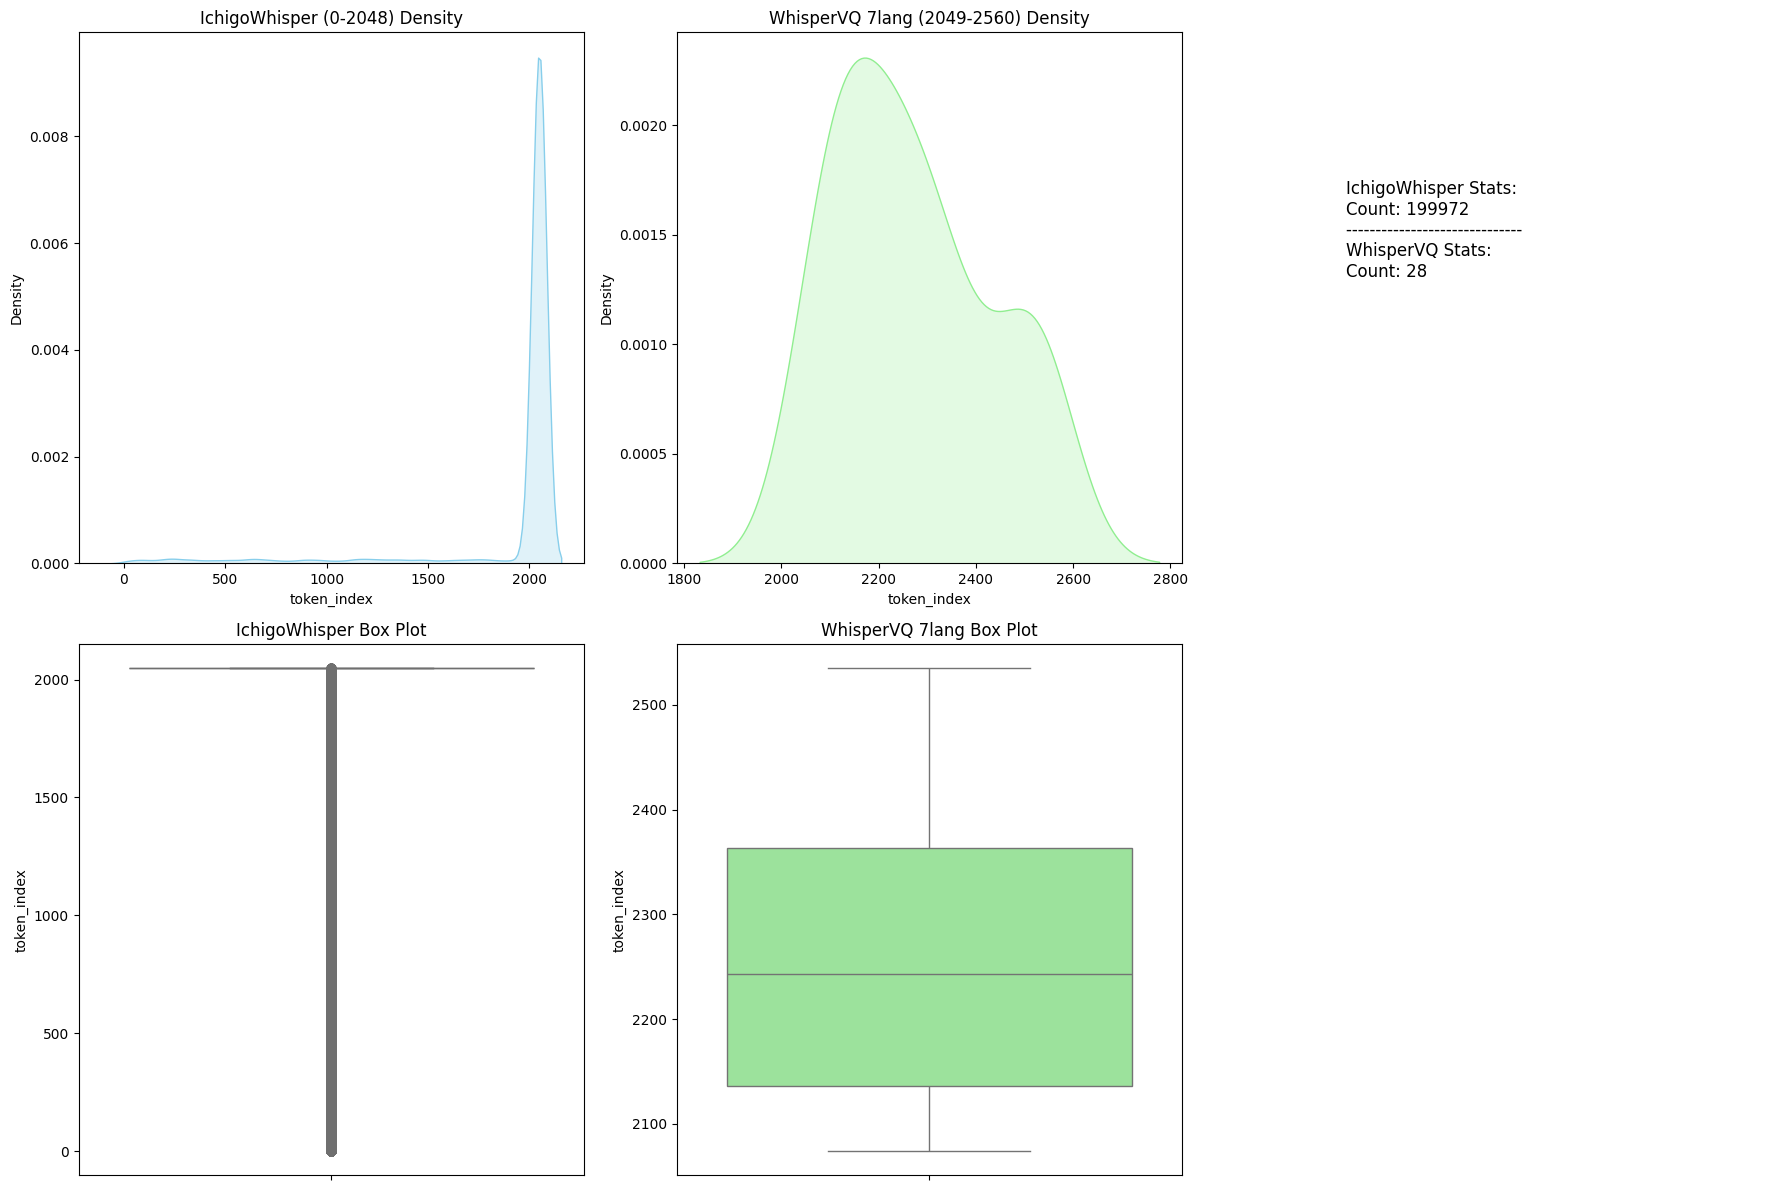

In [12]:
density_box(vie_data)